# **Download Dataset**



```
#!/bin/bash
curl -L -o /content/cat-and-dog.zip\
  https://www.kaggle.com/api/v1/datasets/download/tongpython/cat-and-dog
```



# **Unzip**

`unzip cat-and-dog.zip -d dataset`

In [24]:
import os
import numpy as np

data_path = '/content/dataset/training_set/training_set'

categories = os.listdir(data_path)
print(categories)

labels = np.arange(len(categories))
print(labels)

label_dict = dict(zip(categories, labels))
print(label_dict)

['dogs', 'cats']
[0 1]
{'dogs': np.int64(0), 'cats': np.int64(1)}


In [25]:
import cv2

img_size = 100

data=[]
target=[]

for category in categories:
  imgs_path = os.path.join(data_path, category)
  imgs_names = os.listdir(imgs_path)

  for img_name in imgs_names:
    img_path = os.path.join(imgs_path, img_name)

    try:
      img = cv2.imread(img_path)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img = cv2.resize(img, (img_size, img_size))
      data.append(img)
      target.append(label_dict[category])
    except Exception as e:
      print(img_path,e)

/content/dataset/training_set/training_set/dogs/_DS_Store OpenCV(4.13.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/content/dataset/training_set/training_set/cats/_DS_Store OpenCV(4.13.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



In [26]:
data_new = np.array(data)
target_new = np.array(target)

print(data_new.shape)
print(target_new.shape)

(8005, 100, 100)
(8005,)


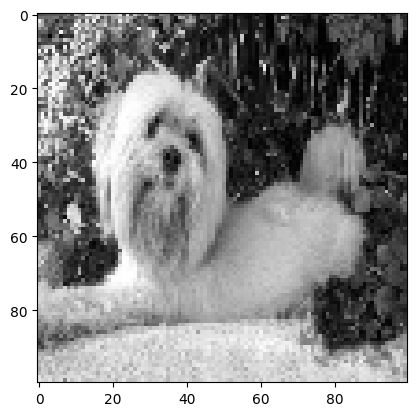

In [27]:
from matplotlib import pyplot as plt

plt.imshow(data_new[3244], cmap='gray')
plt.show()

In [28]:
# Convert to 4d

data_new = data_new.reshape(data_new.shape[0],data_new.shape[1],data_new.shape[2],1)
print(data_new.shape)

(8005, 100, 100, 1)


In [29]:
# Normalization
data_new = data_new/255.0


In [30]:
from tensorflow.keras.utils import to_categorical

target_new = to_categorical(target_new)

In [31]:
np.save('data100', data_new)
np.save('target100', target_new)

np.save('/content/drive/MyDrive/Colab Notebooks/CNN Cat and Dog Classifier/data/data100', data_new)
np.save('/content/drive/MyDrive/Colab Notebooks/CNN Cat and Dog Classifier/data/target100', target)